In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import talib as ta
import talib.abstract as ta
import pandas_ta as pta
from technical import qtpylib


In [2]:
df_1h = pd.read_json('/bali/freqtrade/user_data/data/binance/futures/ETH_USDT-1h-futures.json')
df_1h.columns = ['date', 'open', 'high', 'low', 'close', 'volume']
df_1h['date'] = df_1h.date.apply(lambda x: pd.to_datetime(x, unit='ms'))

In [3]:
df_1h

,date,open,high,low,close,volume
0,2019-11-27 07:00:00,146.00,146.00,146.00,146.00,0.010
1,2019-11-27 08:00:00,125.03,145.01,125.03,133.00,0.080
2,2019-11-27 09:00:00,133.00,133.00,133.00,133.00,0.000
3,2019-11-27 10:00:00,142.20,144.52,142.10,142.62,2832.710
4,2019-11-27 11:00:00,142.70,146.92,142.22,146.58,9079.800
...,...,...,...,...,...,...
25651,2022-10-31 02:00:00,1573.22,1576.88,1561.00,1573.15,231196.824
25652,2022-10-31 03:00:00,1573.15,1584.37,1572.29,1581.93,179702.499
25653,2022-10-31 04:00:00,1581.93,1591.97,1580.80,1588.49,119486.891
25654,2022-10-31 05:00:00,1588.50,1596.00,1586.66,1588.57,141895.096


In [13]:
df_15m = pd.read_json('/bali/freqtrade/user_data/data/binance/futures/ETH_USDT-15m-futures.json')
df_15m.columns = ['date', 'open', 'high', 'low', 'close', 'volume']
df_15m['date'] = df_15m.date.apply(lambda x: pd.to_datetime(x, unit='ms'))

In [4]:
df = pd.read_json('/bali/freqtrade/user_data/data/binance/futures/ETH_USDT-1m-futures.json')
df.columns = ['date', 'open', 'high', 'low', 'close', 'volume']
df['date'] = df.date.apply(lambda x: pd.to_datetime(x, unit='ms'))

In [5]:
df

,date,open,high,low,close,volume
0,2019-11-27 07:45:00,146.00,146.00,146.00,146.00,0.010
1,2019-11-27 07:46:00,146.00,146.00,146.00,146.00,0.000
2,2019-11-27 07:47:00,146.00,146.00,146.00,146.00,0.000
3,2019-11-27 07:48:00,146.00,146.00,146.00,146.00,0.000
4,2019-11-27 07:49:00,146.00,146.00,146.00,146.00,0.000
...,...,...,...,...,...,...
1539323,2022-10-31 07:08:00,1583.42,1583.89,1583.12,1583.13,804.740
1539324,2022-10-31 07:09:00,1583.12,1583.71,1583.12,1583.58,683.228
1539325,2022-10-31 07:10:00,1583.58,1583.71,1583.44,1583.44,675.981
1539326,2022-10-31 07:11:00,1583.45,1583.45,1581.45,1581.76,2555.454


In [3]:
df_1h

,date,open,high,low,close,volume
0,2019-11-27 07:00:00,146.00,146.00,146.00,146.00,0.010
1,2019-11-27 08:00:00,125.03,145.01,125.03,133.00,0.080
2,2019-11-27 09:00:00,133.00,133.00,133.00,133.00,0.000
3,2019-11-27 10:00:00,142.20,144.52,142.10,142.62,2832.710
4,2019-11-27 11:00:00,142.70,146.92,142.22,146.58,9079.800
...,...,...,...,...,...,...
25601,2022-10-29 00:00:00,1553.80,1556.85,1546.71,1552.70,110913.957
25602,2022-10-29 01:00:00,1552.70,1556.00,1551.32,1552.82,55779.297
25603,2022-10-29 02:00:00,1552.82,1578.00,1551.72,1571.44,303472.146
25604,2022-10-29 03:00:00,1571.45,1595.00,1568.06,1588.84,472058.893


In [4]:
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Activation, Flatten, Conv1D, MaxPooling1D
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.optimizers import Adam, SGD, RMSprop, Adagrad, Adadelta, Adamax, Nadam, Ftrl
from keras import backend as K
from numpy import hstack
from sklearn.model_selection import train_test_split


2022-10-29 17:03:45.339994: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-29 17:03:45.487635: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-29 17:03:45.487659: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-10-29 17:03:45.521112: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-29 17:03:46.265577: W tensorflow/stream_executor/pla

In [38]:
# df_1h
n_input = 30
open = df_1h.open.values.reshape((len(df_1h.open.values), 1))
high = df_1h.high.values.reshape((len(df_1h.high.values), 1))
low = df_1h.low.values.reshape((len(df_1h.low.values), 1))
close = df_1h.close.values.reshape((len(df_1h.close.values), 1))
volume = df_1h.volume.values.reshape((len(df_1h.volume.values), 1))
close_pct = df_1h.close.pct_change().values.reshape((len(df_1h.close.values), 1))
features = hstack((open, high, low, close, volume))
generator = TimeseriesGenerator(features, close, length=n_input, batch_size=1)

# specify the model

# generator = TimeseriesGenerator(df_1h.close, df_1h.close, length= n_input, sampling_rate=1, batch_size=1)
# print(generator[0])

In [40]:
X = []
y = []
# train split
for i in range(len(generator)):
    X.append(generator[i][0])
    y.append(generator[i][1])
X = np.array(X)
y = np.array(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(20460, 1, 30, 5) (20460, 1, 1) (5116, 1, 30, 5) (5116, 1, 1)


In [41]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[-2], X_train.shape[-1]))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[-2], X_test.shape[-1]))
y_train = y_train.reshape(y_train.shape[0], -1)
y_test = y_test.reshape(y_test.shape[0], -1)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(20460, 30, 5) (20460, 1) (5116, 30, 5) (5116, 1)


In [210]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(20482, 3, 5) (20482, 1) (5121, 3, 5) (5121, 1)


In [51]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_input, 5)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.summary()
model.fit(X_train, y_train, epochs=5000, verbose=1, validation_data=(X_test, y_test), callbacks=[EarlyStopping(monitor='val_loss', patience=15, verbose=1, mode='auto'), ModelCheckpoint('model.h5', monitor='val_loss', save_best_only=True, mode='auto', period=1)])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 50)                11200     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 11,251
Trainable params: 11,251
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5000
640/640 [==============================] - 8s 11ms/step - loss: 1050496128.0000 - val_loss: 378977504.0000
Epoch 2/5000
640/640 [==============================] - 7s 11ms/step - loss: 45593616.0000 - val_loss: 90576016.0000
Epoch 3/5000
640/640 [==============================] - 7s 10ms/step - loss: 43968652.0000 - val_loss: 174124016.0000
Epoch 4/5000
640/640 [==============================] - 7s 11ms/step - loss: 16494165.0000 

In [36]:
from keras.models import load_model
model = load_model('lstm_model_1029.h5')

2/2 [==============================] - 0s 4ms/step


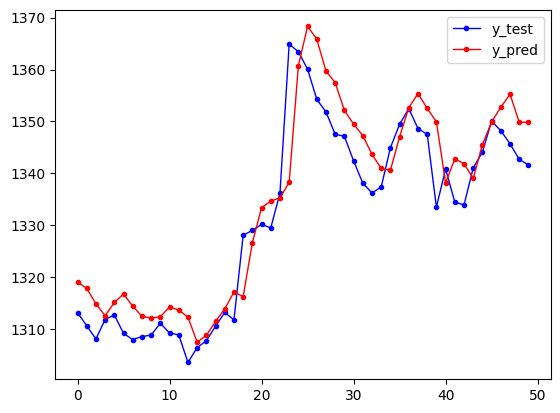

In [50]:
X_test_plt = X_test[-150:-100]
y_test_plt = y_test[-150:-100]
y_pred = model.predict(X_test_plt)
plt.plot(y_test_plt, label='y_test', color='blue',  linewidth=1, linestyle='solid', marker='o', markersize=3, markerfacecolor='blue', markeredgecolor='blue', markeredgewidth=1, alpha=1, zorder=1)
plt.plot(y_pred, label='y_pred', color='red',  linewidth=1, linestyle='solid', marker='o', markersize=3, markerfacecolor='red', markeredgecolor='red', markeredgewidth=1, alpha=1, zorder=1)
plt.legend()
plt.show()


In [34]:
plt.plot(model.history.history['loss'], label='loss', color='blue',  linewidth=1, linestyle='solid', marker='o', markersize=1, markerfacecolor='blue', markeredgecolor='blue', markeredgewidth=1, alpha=1, zorder=1)
plt.plot(model.history.history['val_loss'], label='val_loss', color='red',  linewidth=1, linestyle='solid', marker='o', markersize=1, markerfacecolor='red', markeredgecolor='red', markeredgewidth=1, alpha=1, zorder=1)
plt.legend()
plt.show()

KeyError: 'loss'

In [22]:
loss = model.evaluate(X_test, y_test, verbose=1)

160/160 [==============================] - 1s 3ms/step - loss: 352.7296


In [24]:
model.save('lstm_model_1029.h5')

In [35]:
model.history.history

{}